In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
# Load the data
data = pd.read_csv("C:/Users/shashi/Downloads/melb_data.csv.zip")

# Display basic information about the dataset
print(data.head())
print(data.info())
print(data.describe())

       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

In [72]:
# Data preprocessing
data = data.dropna()  # Remove rows with missing values
data = data[data['Price'] > 0]  # Remove rows with zero or negative prices
y = data['Price']
features = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[features]
print(X.head())

   Rooms  Distance  Bedroom2  Bathroom  Landsize  BuildingArea  YearBuilt
1      2       2.5       2.0       1.0     156.0          79.0     1900.0
2      3       2.5       3.0       2.0     134.0         150.0     1900.0
4      4       2.5       3.0       1.0     120.0         142.0     2014.0
6      3       2.5       4.0       2.0     245.0         210.0     1910.0
7      2       2.5       2.0       1.0     256.0         107.0     1890.0


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the Linear Regression model
model = LinearRegression()
# Fit the model on the training data
model.fit(X,y)
print("First in-sample predictions:", model.predict(X.head()))
print("Actual target values for those homes:", y.head().tolist())



First in-sample predictions: [1142482.15796448 1718828.9080041  1031425.31577842 1794532.56568378
 1250667.17722129]
Actual target values for those homes: [1035000.0, 1465000.0, 1600000.0, 1876000.0, 1636000.0]


In [74]:
# Make predictions on the testing data
predict = model.predict(X)
mae = mean_absolute_error(y, predict)
print("Mean Absolute Error:", mae)

# Check for potential overfitting
print("Mean_Squared_Error:",mean_squared_error(y, predict))#here taining and test data is same

Mean Absolute Error: 296246.89638463274
Mean_Squared_Error: 212070217307.07013


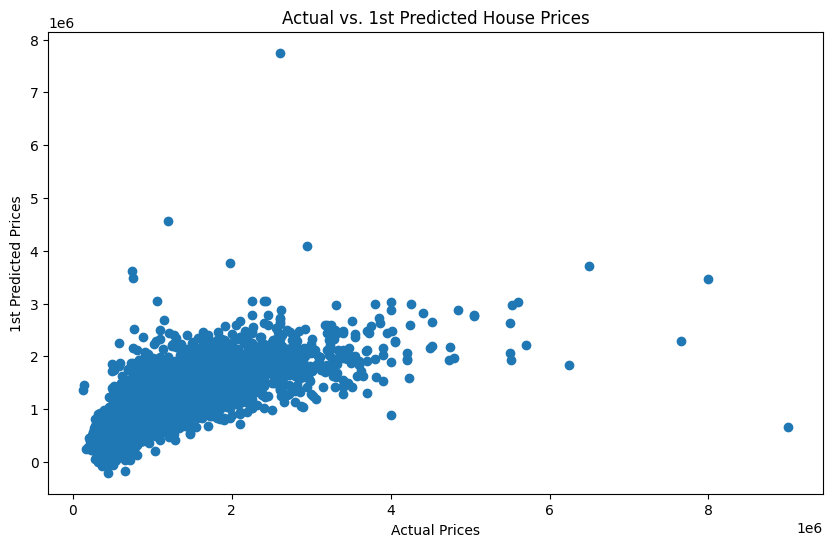

In [75]:
# Visualize predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y, predict)
plt.xlabel("Actual Prices")
plt.ylabel("1st Predicted Prices")
plt.title("Actual vs. 1st Predicted House Prices")
plt.show()


In [76]:
# Now splitting training data and test data to get better results of our prediction
from sklearn.model_selection import train_test_split, GridSearchCV

X = data.drop(columns=['Price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

low_cardinality_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]
my_cols = low_cardinality_cols + numerical_cols
print(my_cols)



['Type', 'Method', 'Regionname', 'Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


In [77]:
X_train = X_train[my_cols].copy()
X_test = X_test[my_cols].copy()
print(X_train.head())


      Type Method             Regionname  Rooms  Distance  Postcode  Bedroom2  \
3257     h      S   Eastern Metropolitan      4      10.5    3081.0       4.0   
119      h      S  Southern Metropolitan      1       3.3    3206.0       1.0   
12148    h      S  Northern Metropolitan      3      20.6    3064.0       3.0   
1323     u      S  Northern Metropolitan      2       5.2    3056.0       2.0   
7358     u     PI  Northern Metropolitan      1       2.5    3121.0       1.0   

       Bathroom  Car  Landsize  BuildingArea  YearBuilt  Lattitude  \
3257        1.0  2.0     722.0         208.0     1975.0  -37.74770   
119         1.0  0.0      81.0          54.0     1900.0  -37.84110   
12148       2.0  3.0     266.0         153.0     2000.0  -37.63544   
1323        1.0  1.0    1140.0          80.0     2010.0  -37.76340   
7358        1.0  1.0       0.0          52.0     2007.0  -37.83010   

       Longtitude  Propertycount  
3257    145.05650         2947.0  
119     144.94970     

In [78]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Type', 'Method', 'Regionname']


In [79]:
# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_test = X_test.copy()

In [80]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_test[object_cols] = ordinal_encoder.transform(X_test[object_cols])

model = LinearRegression()
model.fit(label_X_train, y_train)
new_predict = model.predict(label_X_test)


In [81]:
# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, new_predict)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 261882.7426743855


In [82]:
# Check for potential overfitting
train_predict = model.predict(label_X_train)
train_mse = mean_squared_error(y_train, train_predict)
print("Train Mean_Squared_Error:", train_mse)
test_mse = mean_squared_error(y_test, new_predict)
print("Test Mean_Squared_Error:", test_mse)

Train MSE: 176732917690.3511
Test MSE: 144045858295.82538


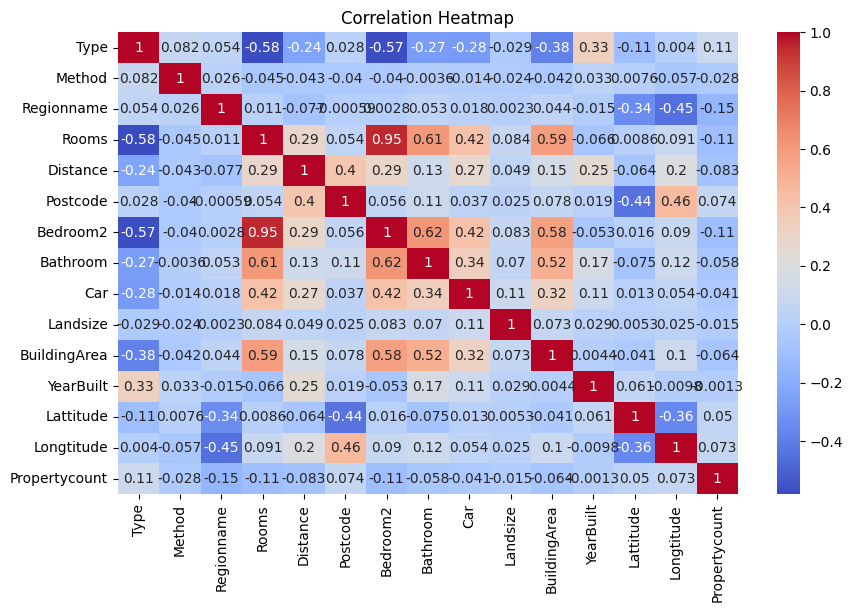

In [83]:
# Heatmap for correlation between features
plt.figure(figsize=(10, 6))
sns.heatmap(label_X_train.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

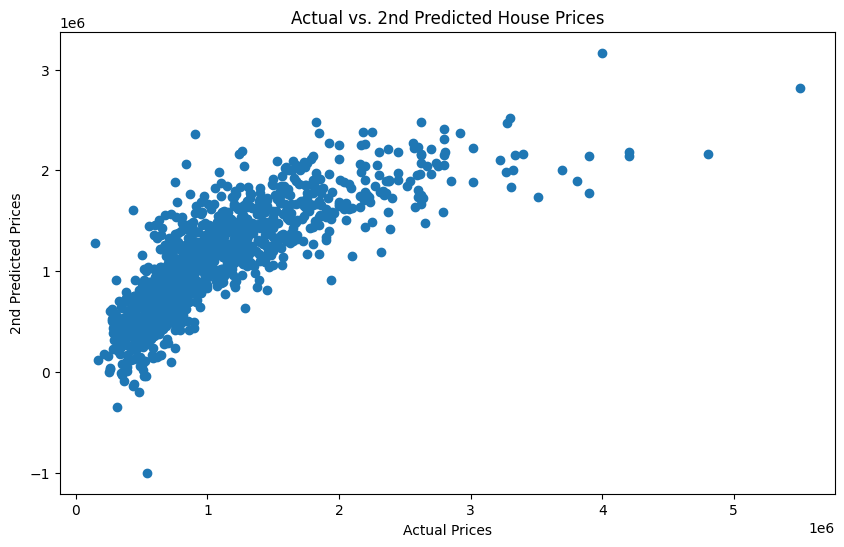

In [84]:
# Visualize new predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, new_predict)
plt.xlabel("Actual Prices")
plt.ylabel("2nd Predicted Prices")
plt.title("Actual vs. 2nd Predicted House Prices")
plt.show()

In [85]:
print("Second in-sample predictions:", model.predict(label_X_train.head()))
print("Actual target values for those homes:", y_train.head().tolist())


Second in-sample predictions: [1149177.19117972 1156006.12650174  454816.19217989  374203.8639088
  471796.76892465]
Actual target values for those homes: [856000.0, 985000.0, 460000.0, 501000.0, 425000.0]


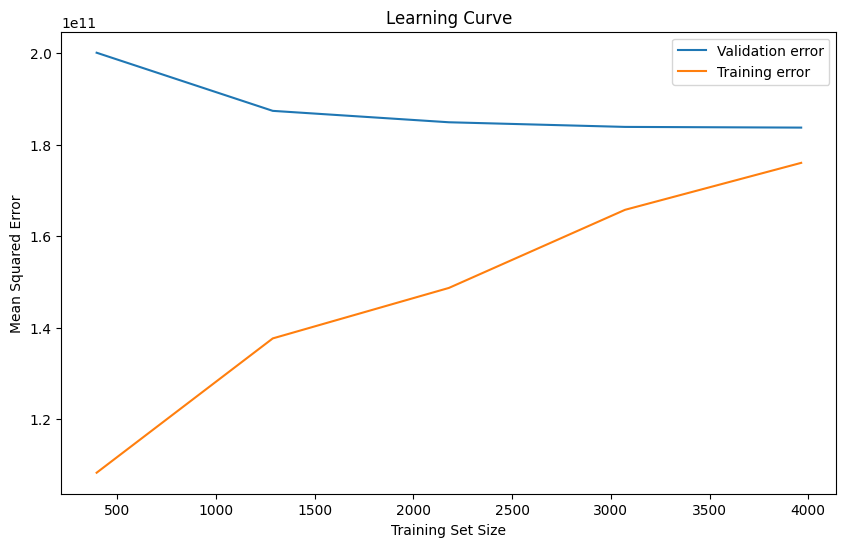

In [86]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, label_X_train, y_train, cv=5, scoring='neg_mean_squared_error')

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Validation error')
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Training error')
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()


In [87]:
# Hyperparameter Tuning using GridSearchCV for Linear Regression
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(label_X_train, y_train)
best_model = grid_search.best_estimator_

In [89]:
# Predict using the best model
new_predict = best_model.predict(label_X_test)
# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, new_predict)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 261882.7426743855


In [90]:
# Check for potential overfitting
train_predict = best_model.predict(label_X_train)
train_mse = mean_squared_error(y_train, train_predict)
print("Train Mean_Squared_Error:", train_mse)
test_mse = mean_squared_error(y_test, new_predict)
print("Test Mean_Squared_Error:", test_mse)

Train Mean_Squared_Error: 176732917690.3511
Test Mean_Squared_Error: 144045858295.82538


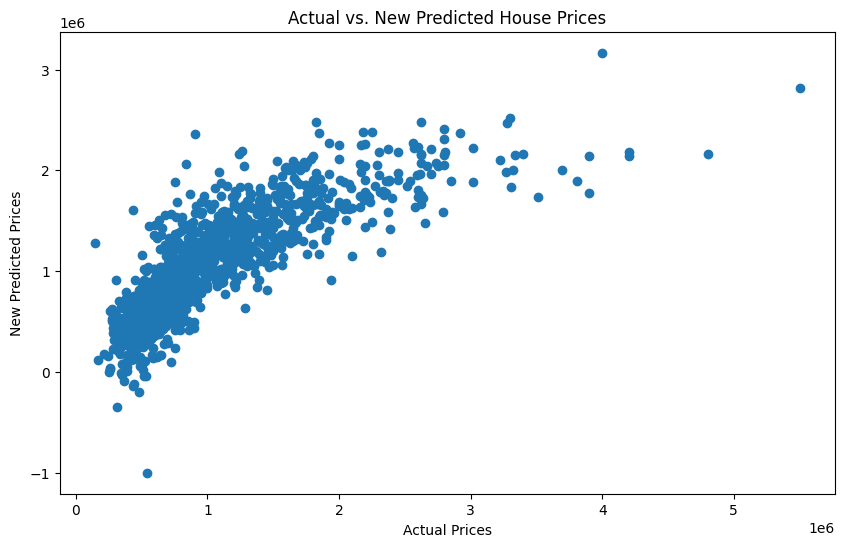

In [91]:
# Visualize new predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, new_predict)
plt.xlabel("Actual Prices")
plt.ylabel("New Predicted Prices")
plt.title("Actual vs. New Predicted House Prices")
plt.show()


In [92]:
# Compare a few in-sample predictions with actual target values
print("Second in-sample predictions:", best_model.predict(label_X_train.head()))
print("Actual target values for those homes:", y_train.head().tolist())


Second in-sample predictions: [1149177.19117972 1156006.12650174  454816.19217989  374203.8639088
  471796.76892465]
Actual target values for those homes: [856000.0, 985000.0, 460000.0, 501000.0, 425000.0]


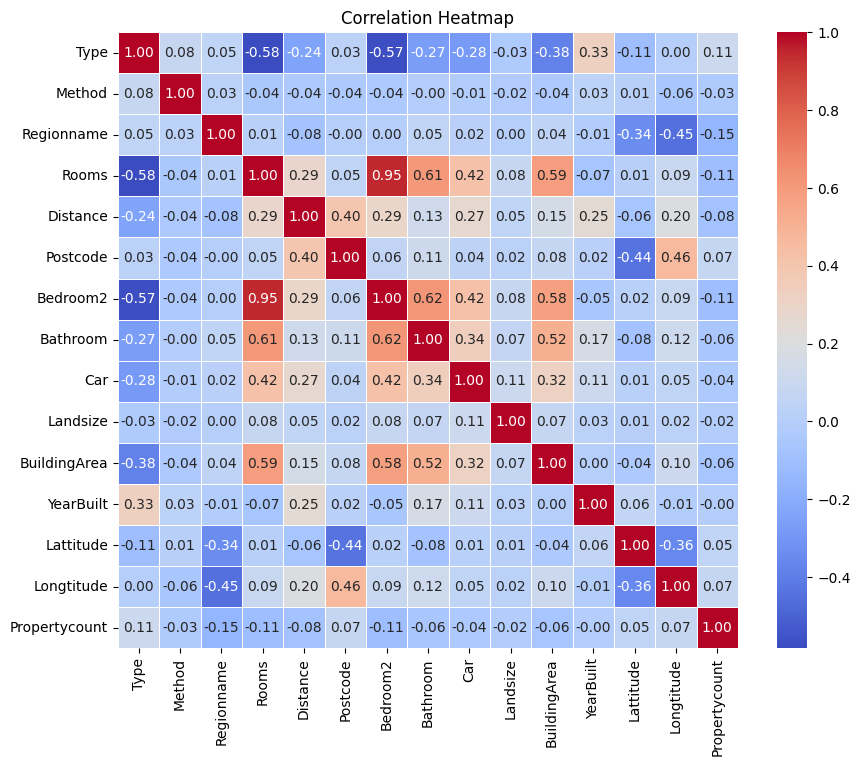

In [93]:
# Heatmap for correlation between features
plt.figure(figsize=(10, 8))
correlation_matrix = label_X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()